In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path_to_train = '/content/drive/MyDrive/911.csv/911.csv'

In [ ]:
import pandas as pd

df = pd.read_csv(path_to_train)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
display

<function IPython.core.display.display(*objs, include=None, exclude=None, metadata=None, transient=None, display_id=None, **kwargs)>

In [ ]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [ ]:
df.shape

(663522, 9)

In [ ]:
#existence of missing values
df.describe()

,lat,lng,zip,e
count,663522.000000,663522.000000,583323.000000,663522.0
mean,40.158162,-75.300105,19236.055791,1.0
std,0.220641,1.672884,298.222637,0.0
min,0.000000,-119.698206,1104.000000,1.0
25%,40.100344,-75.392735,19038.000000,1.0
50%,40.143927,-75.305143,19401.000000,1.0
75%,40.229008,-75.211865,19446.000000,1.0
max,51.335390,87.854975,77316.000000,1.0


In [ ]:
categorical = df.dtypes[df.dtypes==object].index
df[categorical].describe()


,desc,title,timeStamp,twp,addr
count,663522,663522,663522,663229,663522
unique,663282,148,640754,68,41292
top,CITY AVE & CARDINAL AVE; LOWER MERION; Statio...,Traffic: VEHICLE ACCIDENT -,2018-10-06 19:26:38,LOWER MERION,SHANNONDELL DR & SHANNONDELL BLVD
freq,5,148372,9,55490,7285


In [ ]:
#checking for null values
df.isnull().sum()

lat              0
lng              0
desc             0
zip          80199
title            0
timeStamp        0
twp            293
addr             0
e                0
dtype: int64

In [ ]:
df.fillna(method= 'ffill', inplace = True)
df.isnull().sum()

lat          0
lng          0
desc         0
zip          0
title        0
timeStamp    0
twp          0
addr         0
e            0
dtype: int64

In [ ]:
df.drop("e",axis=1,inplace=True) 


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        663522 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663522 non-null  object 
 7   addr       663522 non-null  object 
dtypes: float64(3), object(5)
memory usage: 40.5+ MB


In [ ]:
df["timestamp"] = pd.to_datetime(df["timeStamp"])
df["date"]=df["timestamp"].dt.date
df["day"] = df["timestamp"].dt.day
df["day_of_week"] = df["timestamp"].dt. dayofweek
df["day_of_week"]=df["day_of_week"].map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"})
df["year"] = df["timestamp"].dt.year
df["month"] = df["timestamp"].dt.month
df["hour"] = df["timestamp"].dt.hour
df["minute"] = df["timestamp"].dt.minute
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,timestamp,date,day,day_of_week,year,month,hour,minute
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,2015-12-10 17:10:52,2015-12-10,10,Wednesday,2015,12,17,10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,2015-12-10 17:29:21,2015-12-10,10,Wednesday,2015,12,17,29
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,2015-12-10 14:39:21,2015-12-10,10,Wednesday,2015,12,14,39
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,2015-12-10 16:47:36,2015-12-10,10,Wednesday,2015,12,16,47
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,19401.0,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,2015-12-10 16:56:52,2015-12-10,10,Wednesday,2015,12,16,56


In [ ]:
df.drop("timeStamp", axis = 1)

,lat,lng,desc,zip,title,twp,addr,timestamp,date,day,day_of_week,year,month,hour,minute
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,NEW HANOVER,REINDEER CT & DEAD END,2015-12-10 17:10:52,2015-12-10,10,Wednesday,2015,12,17,10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,2015-12-10 17:29:21,2015-12-10,10,Wednesday,2015,12,17,29
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,NORRISTOWN,HAWS AVE,2015-12-10 14:39:21,2015-12-10,10,Wednesday,2015,12,14,39
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,NORRISTOWN,AIRY ST & SWEDE ST,2015-12-10 16:47:36,2015-12-10,10,Wednesday,2015,12,16,47
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,19401.0,EMS: DIZZINESS,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,2015-12-10 16:56:52,2015-12-10,10,Wednesday,2015,12,16,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663517,40.157956,-75.348060,SUNSET AVE & WOODLAND AVE; EAST NORRITON; 2020...,19403.0,Traffic: VEHICLE ACCIDENT -,EAST NORRITON,SUNSET AVE & WOODLAND AVE,2020-07-29 15:46:51,2020-07-29,29,Tuesday,2020,7,15,46
663518,40.136306,-75.428697,EAGLEVILLE RD & BUNTING CIR; LOWER PROVIDENCE...,19403.0,EMS: GENERAL WEAKNESS,LOWER PROVIDENCE,EAGLEVILLE RD & BUNTING CIR,2020-07-29 15:52:19,2020-07-29,29,Tuesday,2020,7,15,52
663519,40.013779,-75.300835,HAVERFORD STATION RD; LOWER MERION; Station 3...,19041.0,EMS: VEHICLE ACCIDENT,LOWER MERION,HAVERFORD STATION RD,2020-07-29 15:52:52,2020-07-29,29,Tuesday,2020,7,15,52
663520,40.121603,-75.351437,MARSHALL ST & HAWS AVE; NORRISTOWN; 2020-07-29...,19401.0,Fire: BUILDING FIRE,NORRISTOWN,MARSHALL ST & HAWS AVE,2020-07-29 15:54:08,2020-07-29,29,Tuesday,2020,7,15,54


In [ ]:
#splitting the title of the accident into two
df["category"] = df["title"].str.split(":", expand = True)[0]
df["reason"]=df["title"].str.split(":",expand=True)[1]
df.drop("title",axis=1,inplace=True)

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

df['clean_reason'] = df['reason'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['clean_category'] = df['category'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df

In [ ]:
# Text cleaning
# Remove the @user from the text
df['clean_category'] = df['clean_category'].str.replace("@", "")

# Remove the URL from the text
df['clean_category'] = df['clean_category'].str.replace("http\S+|www.\S+", "", case=False)

# Remove the numbers from the text
df['clean_category'] = df['clean_category'].str.replace("\d+", "")

# Remove the whitespaces from the text
df['clean_category'] = df['clean_category'].str.replace("\s+", " ")

# Remove hashtags
df['clean_category'] = df['clean_category'].str.replace("#", "")

# Remove Punctuations
df['clean_category'] = df['clean_category'].str.replace("[^\w\s]", "")

# Lowercase the text
df['clean_category'] = df['clean_category'].str.lower()

In [ ]:
# Text cleaning
# Remove the @user from the text
df['clean_reason'] = df['clean_reason'].str.replace("@", "")

# Remove the URL from the text
df['clean_reason'] = df['clean_reason'].str.replace("http\S+|www.\S+", "", case=False)

# Remove the numbers from the text
df['clean_reason'] = df['clean_reason'].str.replace("\d+", "")

# Remove the whitespaces from the text
df['clean_reason'] = df['clean_reason'].str.replace("\s+", " ")

# Remove hashtags
df['clean_reason'] = df['clean_reason'].str.replace("#", "")

# Remove Punctuations
df['clean_reason'] = df['clean_reason'].str.replace("[^\w\s]", "")

# Lowercase the text
df['clean_reason'] = df['clean_reason'].str.lower()

In [ ]:
#understanding the categories and the reasons for the emergencies for classification
df.category.unique()

array(['EMS', 'Fire', 'Traffic'], dtype=object)

<Axes: xlabel='month', ylabel='count'>

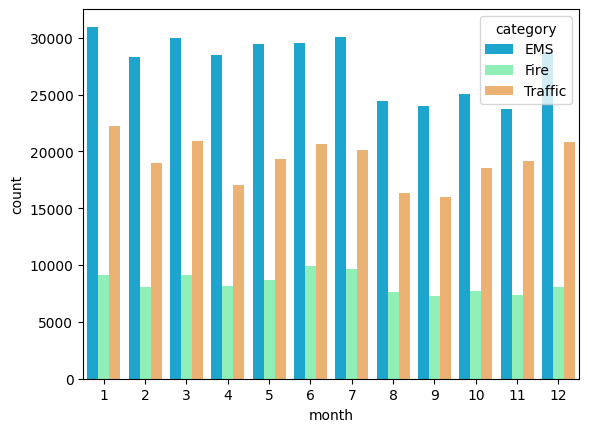

In [ ]:
sns.countplot(x="month", data = df,hue = 'category',palette ="rainbow")


In [ ]:
category_counts = df["category"].value_counts()
category_counts

EMS        332692
Traffic    230208
Fire       100622
Name: category, dtype: int64

In [ ]:
#creating the csv called dummy
#this is what this section should work, "ideally"
df[['lat', 'lng']].to_csv('dummy.csv', index=False)

data = pd.read_csv('dummy.csv')
data.head()

,lat,lng
0,40.297876,-75.581294
1,40.258061,-75.264680
2,40.121182,-75.351975
3,40.116153,-75.343513
4,40.251492,-75.603350


In [ ]:
#this section populates random priority letters through the dataframe of the dummy.csv
import pandas as pd
import string
import random

data = pd.read_csv('dummy.csv')
letters = list(string.ascii_uppercase)[:8]
data['priority'] = letters * (len(data) // len(letters)) + letters[:len(data) % len(letters)]
data['priority'] = random.sample(data['priority'].tolist(), len(data))
data.to_csv('dummy.csv', index=False)

In [ ]:
! pip install gmplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.7/164.7 kB 4.1 MB/s eta 0:00:00


In [ ]:
#this section then assigns a color to the plotted points on the map based on the priority calls 
#this section is the most significant for the dashboard of the drivers to know which areas
import csv
import gmplot

with open('dummy.csv', 'r') as file:
    csvreader = csv.DictReader(file)
    header = csvreader.fieldnames

    gmap = gmplot.GoogleMapPlotter(37.766956, -122.438481, 13)
    for row in csvreader:
        lat = float(row['lat'])
        lng = float(row['lng'])
        priority = row['priority']
        if priority == 'A':
            gmap.marker(lat, lng, color='limegreen')
        elif priority == 'B':
            gmap.marker(lat, lng, color='yellow')
        elif priority == 'C':
            gmap.marker(lat, lng, color='gold')
        elif priority == 'D':
            gmap.marker(lat, lng, color='darkorange')
        elif priority == 'E':
            gmap.marker(lat, lng, color='red')
        elif priority == 'F':
            gmap.marker(lat, lng, color='blue')
        elif priority == 'G':
            gmap.marker(lat, lng, color='orange')
        elif priority == 'H':
            gmap.marker(lat, lng, color='green')
    gmap.draw('my_map.html')


In [ ]:
def extract_EMS_string(call):
    EMS = "EMS:"
    if EMS in call:
        # Find the index of "EMS: " in the string
        start_index = call.index(EMS) + len(EMS)

        # Extract the substring after "EMS: "
        EMS_string = call[start_index:].strip()
        return EMS_string
    else:
        return None

with open('911.csv', "r") as hospital_summary:
    hospital_reader = csv.reader(hospital_summary)

    # Iterate over each row in the CSV file
    for row in hospital_reader:
        # Iterate over each cell in the row
        for cell in row:
            # Extract the EMS string from the cell
            EMS_string = extract_EMS_string(cell)
            if EMS_string is not None:
                print(EMS_string)

In [ ]:
#ideally, these are the keywords
data = ['she has a wound']

mpds_protocol = ['ABDOMINAL PAIN/PROBLEMS',
'ALLERGIES / ENVENOMATINOS',
'ANIMAL BITES / ATTACKS',
'ASSAULT / SEXUAL ASSAULT',
'BACK PAIN (NON-TRAUMATIC NON-RECENT)',
'BREATHING PROBLEMS',
'BURNS / EXPLOSION',
'CARBON MONOXIDE/INHALATION/HAZMAT/CBRN',
'CARDIAC RESPIRATORY ARREST / DEATH',
'CHEST PAIN (NON TRAUMATIC)',
'CHOKING',
'CONVULSIONS / SEIZURES',
'DIABETIC PROBLEMS',
'DROWNING/DIVING/SCUBA ACCIDENT',
'ELECTROCUTION / LIGHTNING',
'EYE PROBLEMS / INJURIES',
'FALLS',
'HEADACHE']

keywords = ['NOT ALERT',
'SUSPECTED AORTIC ANEURYSM >= 50 years',
'KNOWN AORTIC ANEURYSM',
'FAINTING OR NEAR FAINTING>= 50 years',
'FEMALES WITH FAINTING OR NEAR FAINTING 12-50 years',
'MALES WITH PAIN ABOVE NAVEL >= 35 years',
'FEMALES WITH PAIN ABOVE NAVEL >= 45 years',
'ABDOMINAL PAIN',
'INEFFECTIVE BREATHING',
'DIFFICULTY SPEAKING BETWEEN BREATHS',
'SWARMING ATTACK',
'SNAKEBITE',
'DIFFICULTY BREATHING OR SWALLOWING',
'HISTORY OF SEVERE ALLERGIC REACTION',
'UNKNOWN STATUS/OTHER CODES NOT APPLICABLE',
'NO DIFFICULTY BREATHING OR SWALLOWING (RASH, HIVES OR ITCHING)',
'SPIDER BITE',
'UNCONSCIOUS OR ARREST',
'CHEST OR NECK INJURY (DIFFICULTY BREATHING)',
'DANGEROUS BODY AREA',
'LARGE ANIMAL',
'EXOTIC ANIMAL',
'ATTACK OF MULTIPLE ANIMALS',
'POSSIBLY DANGEROUS BODY AREA',
'SERIOUS HEMORRHAGE',
'NOT DANGEROUS BODY AREA',
'NON-RECENT (>= 6 hours) INJURIES',
'SUPERFICIAL BITES',
'MULTIPLE VICTIMS',
'NON-TRAUMATIC BACK PAIN',
'NON-RECENT (>= 6 hours) TRAUMATIC BACK PAIN',
'CHANGING COLOR',
'CLAMMY',
'ABNORMAL BREATHING',
'PERSON ON FIRE',
'BUILDING FIRE WITH PERSONS REPORTED INSIDE',
'BURNS >= 18% BODY AREA',
'SIGNIFICANT FACIAL BURNS',
'BLAST INJURIES (WITHOUT PRIORITY SYMPTOMS)',
'BURNS <18% BODY AREA',
'FIRE ALARM (UNKNOWN SITUATION)',
'SUNBURN OR MINOR BURNS',
'ALERT WITH DIFFICULTY BREATHING',
'ALERT WITHOUT DIFFICULTY BREATHING',
'CARBON MONOXIDE DETECTOR ALARM (WITHOUT PRIORITY)',
'NOT BREATHING AT ALL',
'BREATHING UNCERTAIN (AGONAL)',
'HANGING',
'STRANGULATION',
'SUFFOCATION',
'UNDERWATER',
'OBVIOUS OR EXPECTED DEATH QUESTIONABLE',
'OBVIOUS DEATH QUESTIONABLE',
'EXPECTED DEATH QUESTIONABLE',
'HEART ATTACK OR ANGINA HISTORY',
'COCAINE',
'BREATHING NORMALLY >= 35 YEARS',
'BREATHING NORMALLY < 35 YEARS',
'COMPLETE OBSTRUCTION / INEFFECTIVE BREATHING',
'ABNORMAL BREATHING (PARTIAL OBSTRUCTION)',
'NOT CHOKING NOW (CAN TALK OR CRY)',
'NOT BREATHING',
'CONTINUOUS OR MULTIPLE SEIZURES',
'AGONAL / INEFFECTIVE BREATHING',
'EFFECTIVE BREATHING NOT VERIFIED >=35 YEARS',
'FOCAL SEIZURE (NOT ALERT)',
'PREGNANCY',
'DIABETIC',
'NOT SEIZING NOW AND EFFECTIVE BREATHING VERIFIED',
'HISTORY OF STROKE OR BRAIN TUMOR',
'OVERDOSE / POISONING (INGESTION)',
'ATYPICAL SEIZURE',
'EFFECTIVE BREATHING NOT VERIFIED < 35 YEARS',
'NOT SEIZING NOW AND EFFECTIVE BREATHING VERIFIED (KNOWN SEIZURE DISORDER',
'NOT SEIZING NOW AND EFFECTIVE BREATHING VERIFIED (SEIZURE DISORDER UNKNOWN)',
'NOT SEIZING NOW AND EFFECTIVE BREATHING VERIFIED (<= 6 YEARS OLD, CONFIRMED NO SEIZURE DISORDER)',
'FOCAL SEIZURE (ALERT)',
'IMPENDING SEIZURE (AURA)',
'UNCONSCIOUS',
'ABNORMAL BEHAVIOR',
'ALERT AND BEHAVING NORMALLY',
'DIVING OR SUSPECTED NECK INJURY',
'SCUBA ACCIDENT',
'ALERT WITH ABNORMAL BREATHING',
'ALERT OR BREATHING NORMALLY (INJURIES OR IN WATER)',
'ALERT AND BREATHING NORMALLY (NO INJURIES OUT OF WATER)',
'NOT BREATHING / INEFFECTIVE BREATHING',
'NOT DISCONNECTED FROM POWER',
'POWER NOT OFF OR HAZARD PRESENT',
'EXTREME FALL >= 10 M / 30 FT',
'LONG FALL',
'ALERT AND BREATHING NORMALLY',
'SEVERE EYE INJURIES',
'MODERATE EYE INJURIES',
'MINOR EYES INJURIES',
'MEDICAL EYE PROBLEMS',
'EXTREME FALL( >= 30 FT/10 M)',
'NON-RECENT (>= 6) INJURIES WITHOUT PRIORITY SYMPTOMS',
'PUBLIC ASSIST NO INJURIES NO PRIORITY SYMPTOMS',
'SPEECH PROBLEMS',
'SUDDEN ONSET OF SEVERE PAIN',
'NUMBNESS',
'PARALYSIS',
'CHANGE IN BEHAVIOR',
'BREATHING NORMALLY',
'DIABETIC EMERGENCY']


#i want when one created a message, its the data received on our end, the words are then tokenized and compared to the words above for a cosine similarity for ambulance dispatch
#then, the word is stored in the key words. csv the itearate through each row in the csv, compare the cosine similarity and then update witht he priority score.

In [ ]:
# create a list of (symptoms, priority) tuples
keywords = [
    ("chest pain", "A"),
    ("difficulty breathing", "B"),
    ("fall", "C"),
    ("headache", "D"),
    ("unconscious", "E"),
    ("unknown", "F"),
    ("traumatic injury", "G"),
    ("abdominal pain", "H"),
]

# write the list to a CSV file
with open("key_words.csv", "w", newline="") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["Symptoms", "Priority"])
    for keyword in keywords:
        writer.writerow(keyword)


In [ ]:
# Read the key words file and create a dictionary of keywords and priorities
#ideally this is supposed to be the main function of that is called when a person makes an ambulance call
priority_dict = {}
with open('key_words.csv', 'rt') as key_words:
    for row in csv.reader(key_words):
        keywords = row[0].split(';')
        priority = row[1].strip()
        for keyword in keywords:
            priority_dict[keyword.strip()] = priority

# Function to extract the priority of a call based on its description
def extract_priority(call_description):
    # Split the call description into separate words
    words = call_description.split()

    # Find the first keyword that matches a keyword in the dictionary
    for word in words:
        if word in priority_dict:
            return priority_dict[word]

    # If no matching keyword is found, return None
    return None

# Open the 911.csv file and read each row
with open('911.csv', 'rt') as hospital_summary:
    hospital_reader = csv.reader(hospital_summary)
    next(hospital_reader)  # skip header row

    # Loop through each row and extract the priority of the call
    for row in hospital_reader:
        call_description = row[4]
        priority = extract_priority(call_description)
        print(f"Call description: {call_description}, Priority: {priority}")


In [ ]:
import gensim.downloader as api
model = api.load('word2vec-google-news-300')

def find_most_similar_protocol(text):
    words = text.lower().split()
    total_vector = 0
    # Loop through each word in the input text
    for word in words:
        # Check if the word is in the word2vec vocabulary
        if word in model.vocab:
            total_vector += model[word]
    # Divide the total vector by the number of words to get the average vector
    if len(words) > 0:
        avg_vector = total_vector / len(words)
    else:
        avg_vector = total_vector
    # Find the most similar MPDS protocol using cosine similarity
    most_similar = model.most_similar(positive=[avg_vector], topn=1)
    return most_similar[0][0]

# Test the function with some example inputs
data = ['she has a wound', 'the patient is unconscious', 'the patient is having a heart attack']
for d in data:
    protocol = find_most_similar_protocol(d)
    print(f'The most similar protocol for "{d}" is "{protocol}"')


In [ ]:
! pip install faker

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import csv
from faker import Faker
fake = Faker()

# Define a list of MPDS symptoms and their associated priorities
symptoms = ["Head Injury", "Breathing difficulty", "Abdominal pain", "Seizures", "Cardiac arrest", "Choking", "Stroke", "Trauma", "Overdose", "Unconscious/fainting"]
priorities = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J"]

# Create a list of 1000 randomly generated symptoms with associated priorities
data = [(fake.random.choice(symptoms), fake.random.choice(priorities)) for i in range(1000)]

# Write the data to a CSV file
with open('key_words.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["Symptoms", "Priority"])
    for row in data:
        writer.writerow(row)

In [ ]:
#imports csv module and accesses file as summary_hospital
with open('911.csv', newline='') as summary_hospital:
    summary_reader = csv.reader(summary_hospital)

    #parses each row of data and combines into one string
    for row in summary_reader:
        joined_call = ''.join(row)

        #checks if the string is in the symptoms and returns the priority if it is
        for symptoms, priority in priority_dict.items():
            if symptoms.upper() in joined_call.upper():
                print(row)
                print(priority)

FileNotFoundError: ignored

In [ ]:
## ideally, this is what it should work:
import spacy
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

nlp = spacy.load("en_core_web_md")

keywords = {'urgent': 'P1', 'important': 'P2', 'low': 'P3'}

def get_priority_letter(word):
    keyword_vectors = [nlp(keyword).vector for keyword in keywords.keys()]
    input_word_vector = nlp(word).vector
    similarities = cosine_similarity([input_word_vector], keyword_vectors)[0]
    max_index = np.argmax(similarities)
    priority_letter = keywords[list(keywords.keys())[max_index]]
    return priority_letter


OSError: ignored

In [ ]:
priority_letter = get_priority_letter('urgent')
print(priority_letter)  # Output: P1
